In [5]:
import warnings
warnings.filterwarnings('ignore')
#suppresed the warnings

In [6]:
#Importing all required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Libraries and Uploading the Data

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
#reading the data
tele = pd.read_csv(r'C:\Users\Bhawana Jha\Downloads\telecom_churn_data.csv')

In [12]:
tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
tele.shape

(99999, 226)

In [ ]:
tele.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [ ]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# Data Cleaning

In [ ]:
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in tele.columns if column not in id_cols + date_cols + cat_cols]
print("Total number of cols: %d" % (len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols)))
print("Number of ID Cols: ",len(id_cols))
print("Number of Date Cols: ",len(date_cols))
print("Number of Numeric Cols: ",len(num_cols))
print("Number of Category Cols: ",len(cat_cols))

Total number of cols: 226
Number of ID Cols:  2
Number of Date Cols:  12
Number of Numeric Cols:  204
Number of Category Cols:  8


In [ ]:
#looking for missing values
(tele.isnull().sum()*100/tele.shape[0]).sort_values(ascending=False)

,0
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


In [ ]:
# 1 is the min value for recharge column
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
tele[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


#we observe from above that there are 3 set of values for:
#total recharge amount,
#maximum recharge amount and
#average recharge amount for data.
#total recharge for data
#maximum recharge for data

In [ ]:

#the cutomer didnt recharge because the recharge date and the recharge value are missing
tele.loc[tele.total_rech_data_7.isnull() & tele.date_of_last_rech_data_7.isnull(),\
          ["total_rech_data_7", "date_of_last_rech_data_7"]].head(10)

,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN
13,NaN,NaN


In [ ]:
#impute 0 in recharge columns
zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']
#impute missing values with 0
tele[zero] = tele[zero].apply(lambda x: x.fillna(0))

In [ ]:
#unique values in each column
tele.nunique().sort_values(ascending=False)

,0
mobile_number,99999
arpu_6,85681
arpu_7,85308
arpu_8,83615
arpu_9,79937
total_og_mou_7,40477
total_og_mou_6,40327
total_og_mou_8,40074
total_og_mou_9,39160
total_ic_mou_6,32247


In [ ]:
#Dropping the columns
tele = tele.drop(id_cols + date_cols, axis=1)
tele.shape

(99999, 212)

In [ ]:
#replace missing values with '-1'in categorical columns
tele[cat_cols] = tele[cat_cols].apply(lambda x: x.fillna(-1))

In [ ]:
#Drop variables with more than a given threshold of missing values
ini_cols = tele.shape[1]
thresh = 0.7
inc_cols = list(tele.apply(lambda column: True if column.isnull().sum()/tele.shape[0] < thresh else False))
drop_missing = pd.DataFrame({'features':tele.columns , 'include': inc_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [ ]:
#drop columns
tele = tele.loc[:, inc_cols]
dropped_cols = tele.shape[1] - ini_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [ ]:
#imputing the respective null columns as 0
tele[tele.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = tele[tele.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [ ]:
#Filtering high-value customers
#Observing recharge columns
rch_tele= tele.columns[tele.columns.str.contains('rech_amt|rech_data')]
rch_tele

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [ ]:
#null values in recharge columns
100*tele.loc[:,rch_tele].isnull().sum()/len(tele)

,0
total_rech_amt_6,0.0
total_rech_amt_7,0.0
total_rech_amt_8,0.0
total_rech_amt_9,0.0
max_rech_amt_6,0.0
max_rech_amt_7,0.0
max_rech_amt_8,0.0
max_rech_amt_9,0.0
total_rech_data_6,0.0
total_rech_data_7,0.0


In [ ]:
tele.loc[:,rch_tele].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,0.619726,0.681837,0.698517,0.632806,31.792048,32.406314,33.113011,32.387644,48.445409,51.393440,52.027022,49.961089
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,1.760541,1.924382,1.963417,1.669040,77.248778,78.342435,78.872739,78.818696,127.743863,132.629365,131.182609,127.804280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,17.000000,8.250000,17.000000,23.000000,17.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [ ]:
tele.loc[:,rch_tele].head(10)

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0
1,74.0,384.0,283.0,121.0,44.0,154.0,65.0,50.0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,154.0,50.0,0.0
2,168.0,315.0,116.0,358.0,86.0,200.0,86.0,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0
3,230.0,310.0,601.0,410.0,60.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,196.0,350.0,287.0,200.0,56.0,110.0,110.0,50.0,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
5,120.0,0.0,130.0,130.0,120.0,0.0,130.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,499.0,222.0,294.0,141.0,90.0,37.0,50.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,437.0,601.0,120.0,186.0,90.0,154.0,30.0,36.0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0
9,220.0,195.0,210.0,180.0,110.0,154.0,50.0,130.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,154.0,0.0,0.0


In [ ]:
#Investigation of values for june month only
rch_tele_6= tele.columns[tele.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]
tele.loc[:,rch_tele_6].head(10)

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,362.0,252.0,1.0,252.0,252.0
1,74.0,44.0,0.0,0.0,0.0
2,168.0,86.0,0.0,0.0,0.0
3,230.0,60.0,0.0,0.0,0.0
4,196.0,56.0,1.0,56.0,56.0
5,120.0,120.0,0.0,0.0,0.0
6,499.0,90.0,0.0,0.0,0.0
7,1580.0,1580.0,0.0,0.0,0.0
8,437.0,90.0,0.0,0.0,0.0
9,220.0,110.0,0.0,0.0,0.0


In [ ]:
tele.loc[:,rch_tele_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,327.514615,104.637486,0.619726,31.792048,48.445409
std,398.019701,120.614894,1.760541,77.248778,127.743863
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,30.000000,0.000000,0.000000,0.000000
50%,230.000000,110.000000,0.000000,0.000000,0.000000
75%,437.500000,120.000000,1.000000,8.000000,8.250000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


In [ ]:
#Verifying percentage of null values in recharge based columns
100*tele.loc[:,rch_tele].isnull().sum()/len(tele)

,0
total_rech_amt_6,0.0
total_rech_amt_7,0.0
total_rech_amt_8,0.0
total_rech_amt_9,0.0
max_rech_amt_6,0.0
max_rech_amt_7,0.0
max_rech_amt_8,0.0
max_rech_amt_9,0.0
total_rech_data_6,0.0
total_rech_data_7,0.0


In [ ]:
#Get the index of null vals for both columns and verify both matches
#if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
res1 = tele.total_rech_data_6[tele.total_rech_data_6.isna()].index != tele.av_rech_amt_data_6[tele.av_rech_amt_data_6.isna()].index
print('June :', res1.any())
res2 = tele.total_rech_data_7[tele.total_rech_data_7.isna()].index != tele.av_rech_amt_data_7[tele.av_rech_amt_data_7.isna()].index
print('July :', res2.any())
res3 =tele.total_rech_data_8[tele.total_rech_data_8.isna()].index != tele.av_rech_amt_data_8[tele.av_rech_amt_data_8.isna()].index
print('Aug :', res3.any())

June : False
July : False
Aug : False


#With the above test now we know that if total_rech_data is null then av_rech_amt_data is also null

In [ ]:
#let's add a new derived variable total recharge amount for data :total_rech_amt_data
tele['total_data_rech_6'] = tele.total_rech_data_6 * tele.av_rech_amt_data_6
tele['total_data_rech_7'] = tele.total_rech_data_7 * tele.av_rech_amt_data_7

In [ ]:
#Total recharge amount for June and July
tele['amt_data_6'] = tele.total_rech_amt_6 + tele.total_data_rech_6
tele['amt_data_7'] = tele.total_rech_amt_7 + tele.total_data_rech_7

In [ ]:
#average recharge done by customer in June and July
tele['av_amt_data_6_7'] = (tele.amt_data_6 + tele.amt_data_7)/2

In [ ]:
tele.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,968.0,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,1

#Filter high-value customers
#Define high-value customers as follows:
#Those who have recharged with an amount more than or equal to X,where X is the 70th percentile of the avaergae recharge amount in the first two months(the good phase)


In [ ]:
#70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(tele.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [ ]:
#Extracting High value customers where total average recharge amount for good phase >70th percentile
high_value = tele.loc[tele.av_amt_data_6_7 > tele.av_amt_data_6_7.quantile(0.7), :]
high_value = high_value.reset_index(drop=True)
high_value.shape

(29953, 201)

In [ ]:
print("Number of rows before filtering the high value customers =", len(tele))
print("Number of rows after filtering the high value customers =", len(high_value))

Number of rows before filtering the high value customers = 99999
Number of rows after filtering the high value customers = 29953


In [ ]:
#delete variables created to filter high-value customers=29953
high_value = high_value.drop(['total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_value.shape

(29953, 196)

In [ ]:
high_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(196)
memory usage: 44.8 MB


# Churn Ratio

In [ ]:
#total incoming and outgoing minutes of usage
high_value['total_calls_mou_9'] = high_value.total_ic_mou_9 + high_value.total_og_mou_9

In [ ]:
#2g and 3g data consumption
high_value['total_internet_mb_9'] =  high_value.vol_2g_mb_9 + high_value.vol_3g_mb_9

In [ ]:
#Those who have not used either calls or internet in september are churned customers
#denote 0 as not churn and 1 as churn 

high_value['churn'] = high_value.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

#verify that the churn is tagged correctly

In [ ]:
month_9_cols = high_value.columns[high_value.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below: ")
month_9_cols

The columns names ends with _9 are given below: 


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9', 'total_calls_mou_9', 'total_internet_mb_9'],
      dtype='object')

In [ ]:
#so,deleting derived variables
high_value = high_value.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [ ]:
#change data type to category
high_value.churn = high_value.churn.astype("category")
#print churn ratio
print("Churn Ratio:")
print(high_value.churn.value_counts()*100/high_value.shape[0])

Churn Ratio:
churn
0    91.877274
1     8.122726
Name: count, dtype: float64


In [ ]:
high_value['arpu_diff'] = high_value.arpu_8 - ((high_value.arpu_6 + high_value.arpu_7)/2)
high_value['onnet_mou_diff'] = high_value.onnet_mou_8 - ((high_value.onnet_mou_6 + high_value.onnet_mou_7)/2)
high_value['offnet_mou_diff'] = high_value.offnet_mou_8 - ((high_value.offnet_mou_6 + high_value.offnet_mou_7)/2)
high_value['roam_ic_mou_diff'] = high_value.roam_ic_mou_8 - ((high_value.roam_ic_mou_6 + high_value.roam_ic_mou_7)/2)
high_value['roam_og_mou_diff'] = high_value.roam_og_mou_8 - ((high_value.roam_og_mou_6 + high_value.roam_og_mou_7)/2)
high_value['loc_og_mou_diff'] = high_value.loc_og_mou_8 - ((high_value.loc_og_mou_6 + high_value.loc_og_mou_7)/2)
high_value['std_og_mou_diff'] = high_value.std_og_mou_8 - ((high_value.std_og_mou_6 + high_value.std_og_mou_7)/2)
high_value['isd_og_mou_diff'] = high_value.isd_og_mou_8 - ((high_value.isd_og_mou_6 + high_value.isd_og_mou_7)/2)
high_value['spl_og_mou_diff'] = high_value.spl_og_mou_8 - ((high_value.spl_og_mou_6 + high_value.spl_og_mou_7)/2)
high_value['total_og_mou_diff'] = high_value.total_og_mou_8 - ((high_value.total_og_mou_6 + high_value.total_og_mou_7)/2)
high_value['loc_ic_mou_diff'] = high_value.loc_ic_mou_8 - ((high_value.loc_ic_mou_6 + high_value.loc_ic_mou_7)/2)
high_value['std_ic_mou_diff'] = high_value.std_ic_mou_8 - ((high_value.std_ic_mou_6 + high_value.std_ic_mou_7)/2)
high_value['isd_ic_mou_diff'] = high_value.isd_ic_mou_8 - ((high_value.isd_ic_mou_6 + high_value.isd_ic_mou_7)/2)
high_value['spl_ic_mou_diff'] = high_value.spl_ic_mou_8 - ((high_value.spl_ic_mou_6 + high_value.spl_ic_mou_7)/2)
high_value['total_ic_mou_diff'] = high_value.total_ic_mou_8 - ((high_value.total_ic_mou_6 + high_value.total_ic_mou_7)/2)
high_value['total_rech_num_diff'] = high_value.total_rech_num_8 - ((high_value.total_rech_num_6 + high_value.total_rech_num_7)/2)
high_value['total_rech_amt_diff'] = high_value.total_rech_amt_8 - ((high_value.total_rech_amt_6 + high_value.total_rech_amt_7)/2)
high_value['max_rech_amt_diff'] = high_value.max_rech_amt_8 - ((high_value.max_rech_amt_6 + high_value.max_rech_amt_7)/2)
high_value['total_rech_data_diff'] = high_value.total_rech_data_8 - ((high_value.total_rech_data_6 + high_value.total_rech_data_7)/2)
high_value['max_rech_data_diff'] = high_value.max_rech_data_8 - ((high_value.max_rech_data_6 + high_value.max_rech_data_7)/2)
high_value['av_rech_amt_data_diff'] = high_value.av_rech_amt_data_8 - ((high_value.av_rech_amt_data_6 + high_value.av_rech_amt_data_7)/2)
high_value['vol_2g_mb_diff'] = high_value.vol_2g_mb_8 - ((high_value.vol_2g_mb_6 + high_value.vol_2g_mb_7)/2)
high_value['vol_3g_mb_diff'] = high_value.vol_3g_mb_8 - ((high_value.vol_3g_mb_6 + high_value.vol_3g_mb_7)/2)

In [ ]:
high_value['total_og_mou_diff'].describe()

,total_og_mou_diff
count,29953.000000
mean,-67.461292
std,502.520398
min,-7213.410000
25%,-167.865000
50%,-14.625000
75%,67.915000
max,12768.705000


In [ ]:
#9th Month (churned month)Columns
col_9 =  high_value.columns[high_value.columns.str.contains('_9')]

In [ ]:
#all names ending with 9
col_9 = high_value.filter(regex='9$', axis=1).columns
cat_cols = [col for col in cat_cols if col not in col_9]
cat_cols.append('churn')
num_cols = [col for col in high_value.columns if col not in cat_cols]

In [ ]:
#change columns types
high_value[num_cols] = high_value[num_cols].apply(pd.to_numeric)
high_value[cat_cols] = high_value[cat_cols].apply(lambda column: column.astype("category"), axis=0)

# EDA

In [ ]:
#plotting functions
def dtype(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def uni(variable, stats=True):

    if dtype(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())

    elif dtype(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())

    else:
        print("Invalid variable")

def bi(var1, var2):
    if dtype(var1) == 'numerical' and dtype(var2) == 'numerical':
        sns.regplot(x=var1, y=var2)
    elif (dtype(var1) == 'categorical' and dtype(var2) == 'numerical') or (dtype(var1) == 'numerical' and dtype(var2) == 'categorical'):
        sns.boxplot(x=var1, y=var2)

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


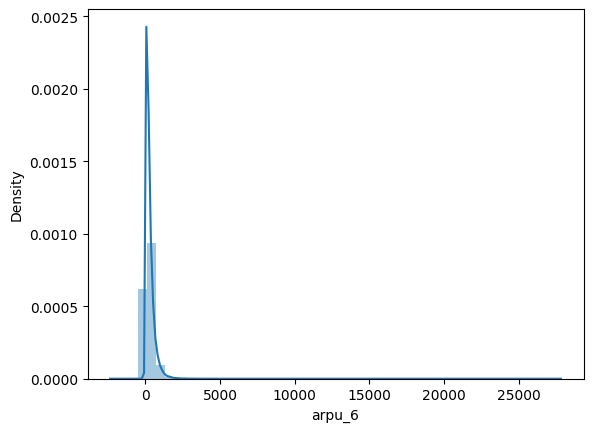

In [ ]:
uni(tele.arpu_6)

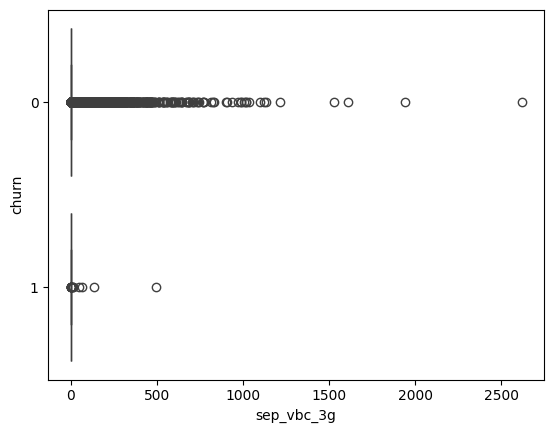

In [ ]:
bi(high_value.sep_vbc_3g, high_value.churn)

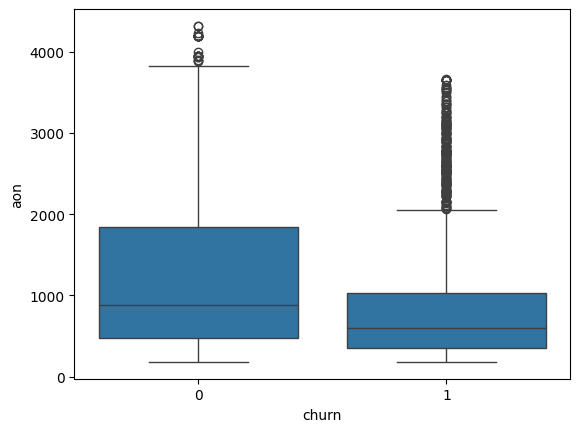

In [ ]:
bi(high_value.churn, high_value.aon)

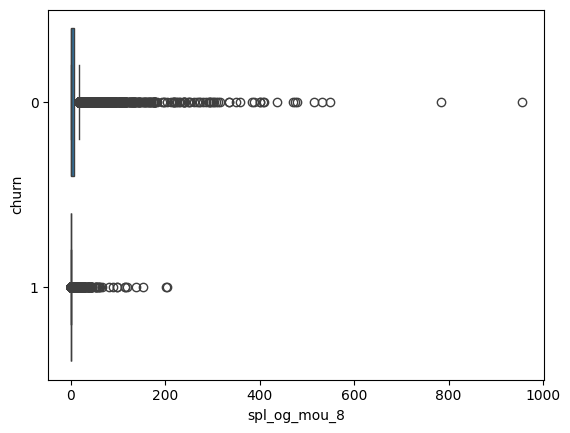

In [ ]:
bi(high_value.spl_og_mou_8, high_value.churn)

count    99999.000000
mean       175.595457
std        310.968398
min          0.000000
25%         16.030000
50%         74.680000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


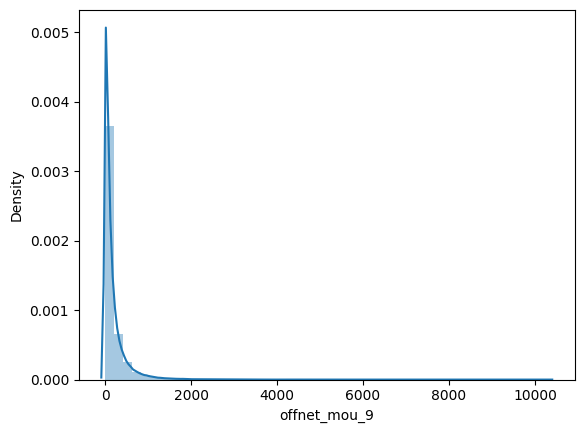

In [ ]:
uni(tele.offnet_mou_9)

count    99999.000000
mean       125.864313
std        302.023240
min          0.000000
25%          4.090000
50%         28.040000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


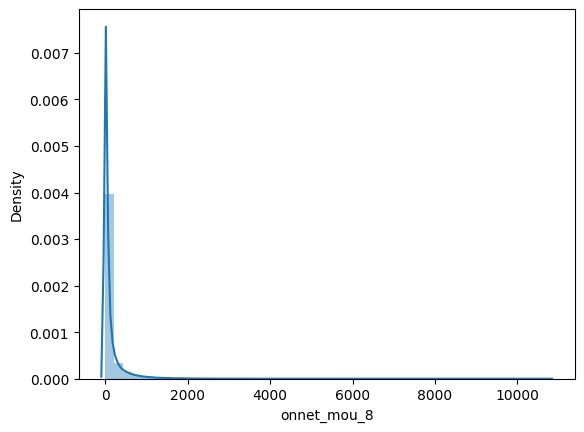

In [ ]:
uni(tele.onnet_mou_8)

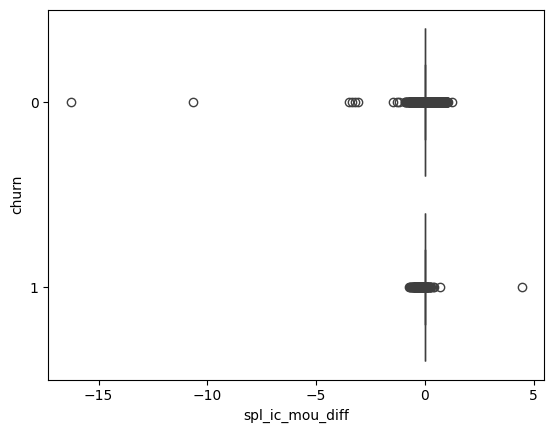

In [ ]:
bi(high_value.spl_ic_mou_diff, high_value.churn)

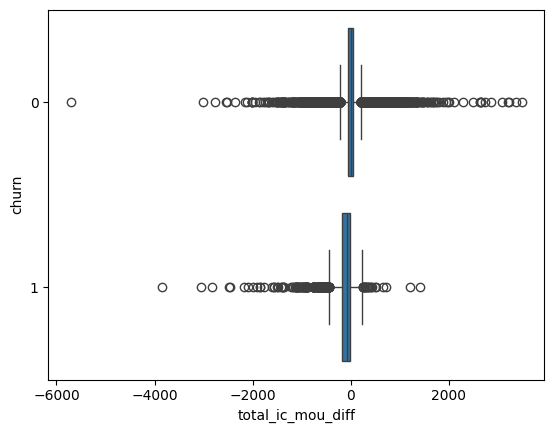

In [ ]:
bi(high_value.total_ic_mou_diff, high_value.churn)

# EDA - Summary

# Calls Revenue (3 columns):

Invalid Values: Negative minimum values indicate some customers are causing losses for the company. These columns may either be invalid or not beneficial for our prediction and can be removed from the dataset.

Standardize: Revenue columns should be rounded to 2 decimal places.

# Minutes of Usage (60+ columns):

Generally, usage minutes are 0 except for a few outliers in these variables:

Roaming Incoming

ISD Incoming

Special Incoming

Other STD Incoming

T2F STD Outgoing

T2F Outgoing

Other ISD Outgoing

Local Outgoing

T2C (Customer Care Calls)

Most columns contain outliers.

Aggregating columns based on Incoming and Outgoing calls or by each type of Incoming and Outgoing calls and examining the metrics will provide better insights into the data.

# Recharge (12 Numeric + 3 Date columns):

Data Type Conversion:

Numeric columns are integers and can be converted to int type.

Date columns need to be converted to date type.

# Data 2G and 3G (22 Columns):

Most columns have a median of 0 and contain outliers.

vbc_3g columns need renaming to encode the month as numbers.

Standardize: Columns should be rounded to 2 decimal places.

# Age on Network (1 Column):

A feature can be derived from the AON (Age on Network) column.

# Churn (Dependent Variable):

There is a class imbalance in the dataset, with actual churn customers comprising only 6% of the dataset.

# Reviewing the Dropped Columns:

More columns may be lost due to dropping those with missing values. This can be managed by imputing values and considering 0 as missing values, following a pattern where "Calls only" users have blanks for data-related columns and vice versa.

# Feature Engineering - Thoughts:

Derive the number of years the customer has been using the network from AON.

Create fields to indicate the type of user (e.g., Uses Both Calls and Data, Only Calls, Only Data, Only Incoming Calls, Only Outgoing Calls).

Segment customers based on service usage, recharge amount, and usage/recharge patterns.

Calls to Customer Care can be a key indicator of customer dissatisfaction; derive columns like "time over call."

In [ ]:
# Create function to analyze the features across 6th, 7th, and 8th month
def analyze(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()

    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6, 7, 8]}
    print(cols)

    frame_data = []
    for churn in [0, 1]:
        frame_data.append({
            "mean_6": high_value[high_value["churn"] == churn][cols[6]].mean(),
            "mean_7": high_value[high_value["churn"] == churn][cols[7]].mean(),
            "mean_8": high_value[high_value["churn"] == churn][cols[8]].mean(),
            "std_6": high_value[high_value["churn"] == churn][cols[6]].std(),
            "std_7": high_value[high_value["churn"] == churn][cols[7]].std(),
            "std_8": high_value[high_value["churn"] == churn][cols[8]].std()
        })

    f, axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=high_value, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=high_value, y=feature_start + "_7", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=high_value, y=feature_start + "_8", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])

    return pd.DataFrame(frame_data, index=["Non Churned", "Churned"]).round(2)


Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,649.97,663.89,613.98,547.95,574.45,615.04
Churned,787.33,627.46,253.69,682.48,668.66,452.97


<Figure size 1700x700 with 0 Axes>

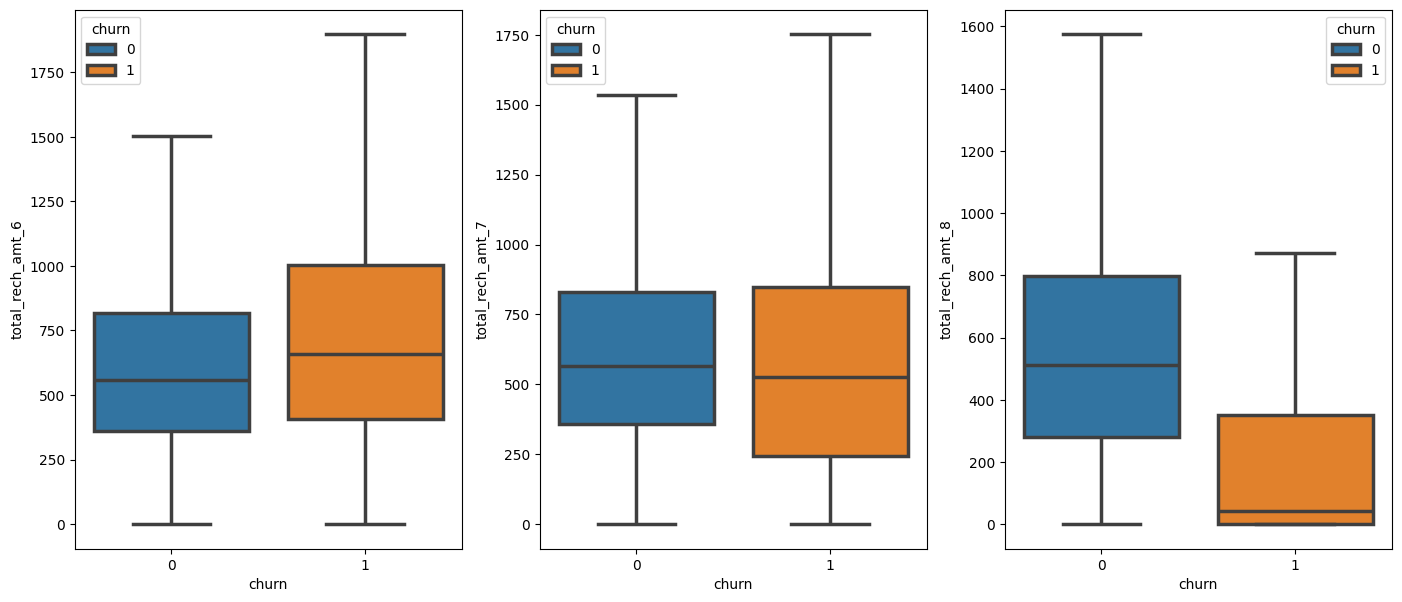

In [ ]:

analyze('total_rech_amt')

In [ ]:
rech_amnt_col =  high_value.columns[high_value.columns.str.contains('rech_amt')]
rech_amnt_col

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'av_rech_amt_data_diff'],
      dtype='object')

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,169.10,173.40,166.83,172.1,176.85,171.42
Churned,172.18,159.66,85.54,209.4,227.28,176.90


<Figure size 1700x700 with 0 Axes>

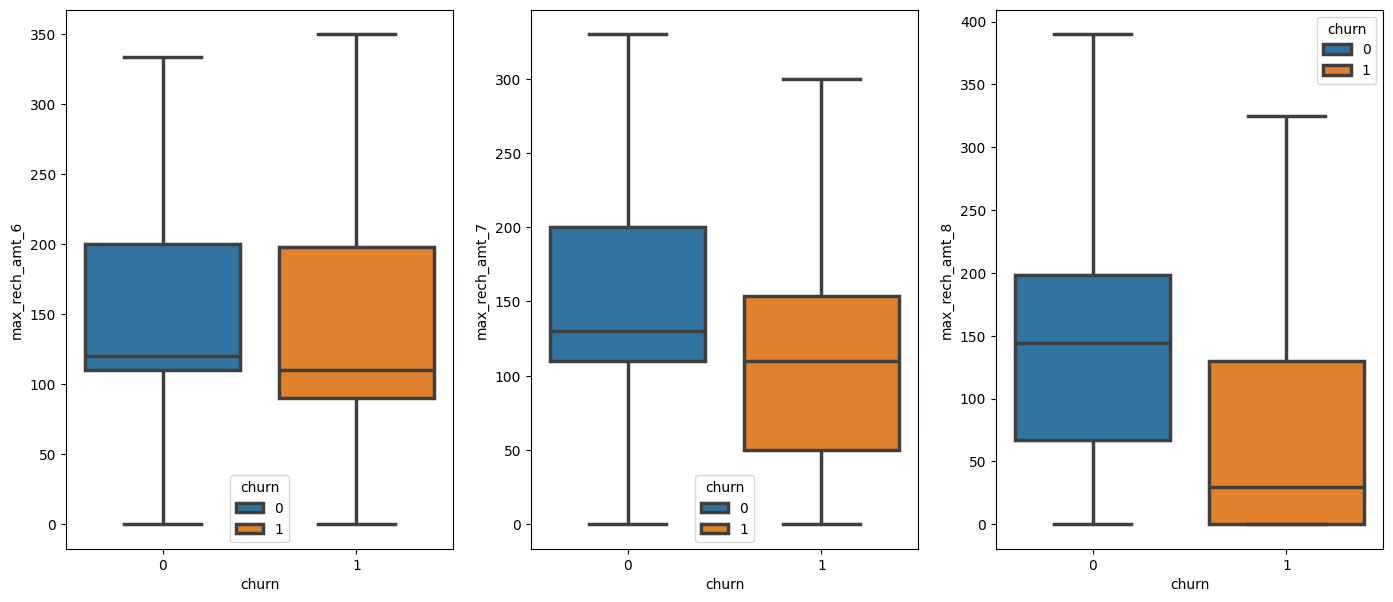

In [ ]:
#Lets analyze total recharge amount for data: 
analyze('max_rech_amt')

In [ ]:
pd.crosstab(high_value.churn, high_value.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.918105,97.114275,97.360704
1,14.081895,2.885725,2.639296


In [ ]:
pd.crosstab(high_value.churn, high_value.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24936,1608,397,183,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2361,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [ ]:
#example of capping 
sample_array = list(range(100))

#add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

#cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [ ]:
#cap outliers in the numeric columns
high_value[num_cols] = high_value[num_cols].apply(outliers, axis=0)

In [ ]:
high_value.describe(percentiles=[0.10,.25,.5,.75,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29

# Model Building

## Spliting the Data

In [ ]:
#building the model now
#got numeric from
high_value['churn'] = pd.to_numeric(high_value['churn'])

In [ ]:
X = high_value.drop("churn", axis = 1)
y = high_value.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

,churn
fb_user_8,
-1.0,0.141152
0.0,0.062857
1.0,0.025074


In [ ]:
y_test.shape

(7489,)

In [ ]:
y_train.shape

(22464,)

In [ ]:
X_train.shape

(22464, 219)

In [ ]:
X_test.shape

(7489, 219)

In [ ]:
#replace categories with aggregated values
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [ ]:
#datatypes
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 22464 entries, 14197 to 17924
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  22464 non-null  category
 1   night_pck_user_7  22464 non-null  category
 2   night_pck_user_8  22464 non-null  category
 3   fb_user_6         22464 non-null  category
 4   fb_user_7         22464 non-null  category
 5   fb_user_8         22464 non-null  category
dtypes: category(6)
memory usage: 307.9 KB


## PCA

In [ ]:
(high_value.isnull().sum()*100/high_value.shape[0]).sort_values(ascending=False)

,0
loc_og_t2o_mou,0.0
max_rech_data_6,0.0
max_rech_amt_7,0.0
max_rech_amt_8,0.0
max_rech_amt_9,0.0
last_day_rch_amt_6,0.0
last_day_rch_amt_7,0.0
last_day_rch_amt_8,0.0
last_day_rch_amt_9,0.0
total_rech_data_6,0.0


In [ ]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [ ]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [ ]:
#extract pca model from pipeline
pca = pca.named_steps['pca']

#look at explained variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.51
1       21.20
2       27.00
3       31.55
4       35.25
5       38.77
6       41.42
7       43.63
8       45.74
9       47.81
10      49.78
11      51.64
12      53.32
13      54.84
14      56.33
15      57.75
16      59.07
17      60.34
18      61.50
19      62.63
20      63.73
21      64.80
22      65.79
23      66.76
24      67.68
25      68.57
26      69.43
27      70.28
28      71.12
29      71.94
30      72.73
31      73.50
32      74.25
33      74.99
34      75.70
35      76.39
36      77.05
37      77.68
38      78.31
39      78.92
40      79.50
41      80.06
42      80.56
43      81.05
44      81.53
45      81.99
46      82.44
47      82.87
48      83.30
49      83.73
50      84.14
51      84.54
52      84.92
53      85.28
54      85.64
55      85.98
56      86.31
57      86.64
58      86.96
59      87.28
60      87.58
61      87.89
62      88.18
63      88.47
64      88.76
65      89.03
66      89.31
67      89.57
68      89.84
69      90.10
70      90.35
71    

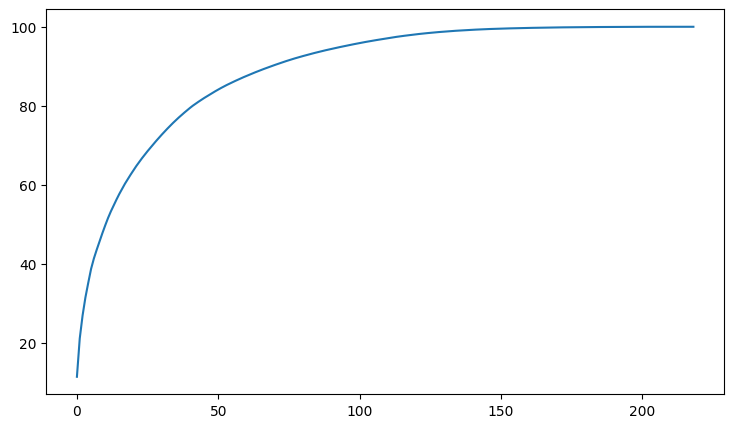

In [ ]:

#plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

In [ ]:
#create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),("pca", PCA(n_components=PCA_VARS)),("logistic", LogisticRegression(class_weight='balanced'))]
pipeline = Pipeline(steps)

## Fitting the Model

In [ ]:
#fit model
pipeline.fit(X_train, y_train)

#check score on train data
pipeline.score(X_train, y_train)

0.9603365384615384

In [ ]:
#predicting churn on test data
y_pred = pipeline.predict(X_test)

#creating confusion matrix
print(confusion_matrix(y_test, y_pred))

#checking sensitivity and specifity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

#checking area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6561  320]
 [   4  604]]
Sensitivity: 	0.99
Specificity: 	0.95
AUC:    	 0.99


## Hyperparameter tuning

### Using Logistic Regression

#Hyperparameter tuning

In [ ]:
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

In [ ]:
steps = [("scaler", StandardScaler()),("pca", PCA()),("logistic", logistic)]

In [ ]:
#Compiling them
pca_logistic = Pipeline(steps)

In [ ]:
param = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.4, 0.5], 'logistic__penalty': ['l1', 'l2']}

In [ ]:
#5folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [ ]:
#Model
model = GridSearchCV(estimator = pca_logistic, cv = fold, param_grid = param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
#fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.4, 0.5],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [ ]:
#cross validation
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.663271,0.188506,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.578760,0.142056,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,0.936528,0.402540,0.105262,0.056892,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.993828,0.989682,0.990522,0.991148,0.991579,0.991352,0.001393,6
3,1.317908,0.311690,0.084143,0.030666,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.995213,0.992648,0.992225,0.992746,0.992777,0.993122,0.001064,3
4,0.709015,0.070463,0.000000,0.000000,0.4,l1,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
5,0.633919,0.038778,0.000000,0.000000,0.4,l1,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
6,1.286169,0.376411,0.134669,0.037686,0.4,l2,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.994250,0.989922,0.991098,0.991256,0.991648,0.991635,0.001428,5
7,1.339343,0.228870,0.105162,0.008466,0.4,l2,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.996032,0.993922,0.993390,0.993226,0.992931,0.993900,0.001113,2
8,0.648468,0.056485,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
9,0.579489,0.057189,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [ ]:
# best hyperparameters score
model.best_score_

0.993989780222854

In [ ]:
# best hyperparameters
model.best_params_

{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}

In [ ]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),3))

[[6612  269]
 [   3  605]]
Sensitivity: 	1.0
Specificity: 	0.96
AUC:    	 0.994


### Using random forest

In [ ]:
fr = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [ ]:
param = {"criterion": ['gini', 'entropy'], "max_features": [1]}

In [ ]:
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [ ]:
model = GridSearchCV(estimator=fr, cv=fold, param_grid=param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1]},
             scoring='roc_auc', verbose=1)

In [ ]:
model.best_score_

0.9992931345144225

In [ ]:
# best hyperparameters
model.best_params_

{'criterion': 'gini', 'max_features': 1}

In [ ]:
#predicting churn on test data
y_pred = model.predict(X_test)

#creating confusion matrix
print(confusion_matrix)

#checking sensitivity,specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

#checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6868   13]
 [  54  554]]
Sensitivity: 	0.91
Specificity: 	1.0
AUC:    	 1.0


Random forest is overfitting the model therefore we move forward with logistic regression.

In [ ]:
max_features = int(round(np.sqrt(X_train.shape[1])))
rand_fr_model = RandomForestClassifier(n_estimators=100, max_features = max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=20, verbose=1)

In [ ]:
rand_fr_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=15,
                       oob_score=True, random_state=20, verbose=1)

In [ ]:
# checking OOB score
rand_fr_model.oob_score_

0.9996438746438746

In [ ]:
y_pred = rand_fr_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
y_pred_prob = rand_fr_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[[6881    0]
 [   0  608]]
Sensitivity: 	1.0
Specificity: 	1.0
ROC:    	 1.0


## Feauture Importance

In [ ]:
feature = high_value.drop('churn', axis=1).columns

In [ ]:
importance = rand_fr_model.feature_importances_

In [ ]:
feature_imp = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_imp = feature_imp[['variables', 'importance_percentage']]

In [ ]:
feature_imp = feature_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_imp.importance_percentage.sum())
feature_imp

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_9,8.643721e+00
1,loc_ic_t2m_mou_9,8.636399e+00
2,loc_ic_mou_9,7.839673e+00
3,loc_og_mou_9,7.476869e+00
4,loc_og_t2t_mou_9,6.486731e+00
5,loc_ic_t2t_mou_9,5.402265e+00
6,loc_og_t2m_mou_9,4.667902e+00
7,arpu_9,4.616008e+00
8,max_rech_amt_9,4.454783e+00
9,total_og_mou_9,3.632282e+00


In [ ]:
top_fea = feature_imp.variables[0:50]

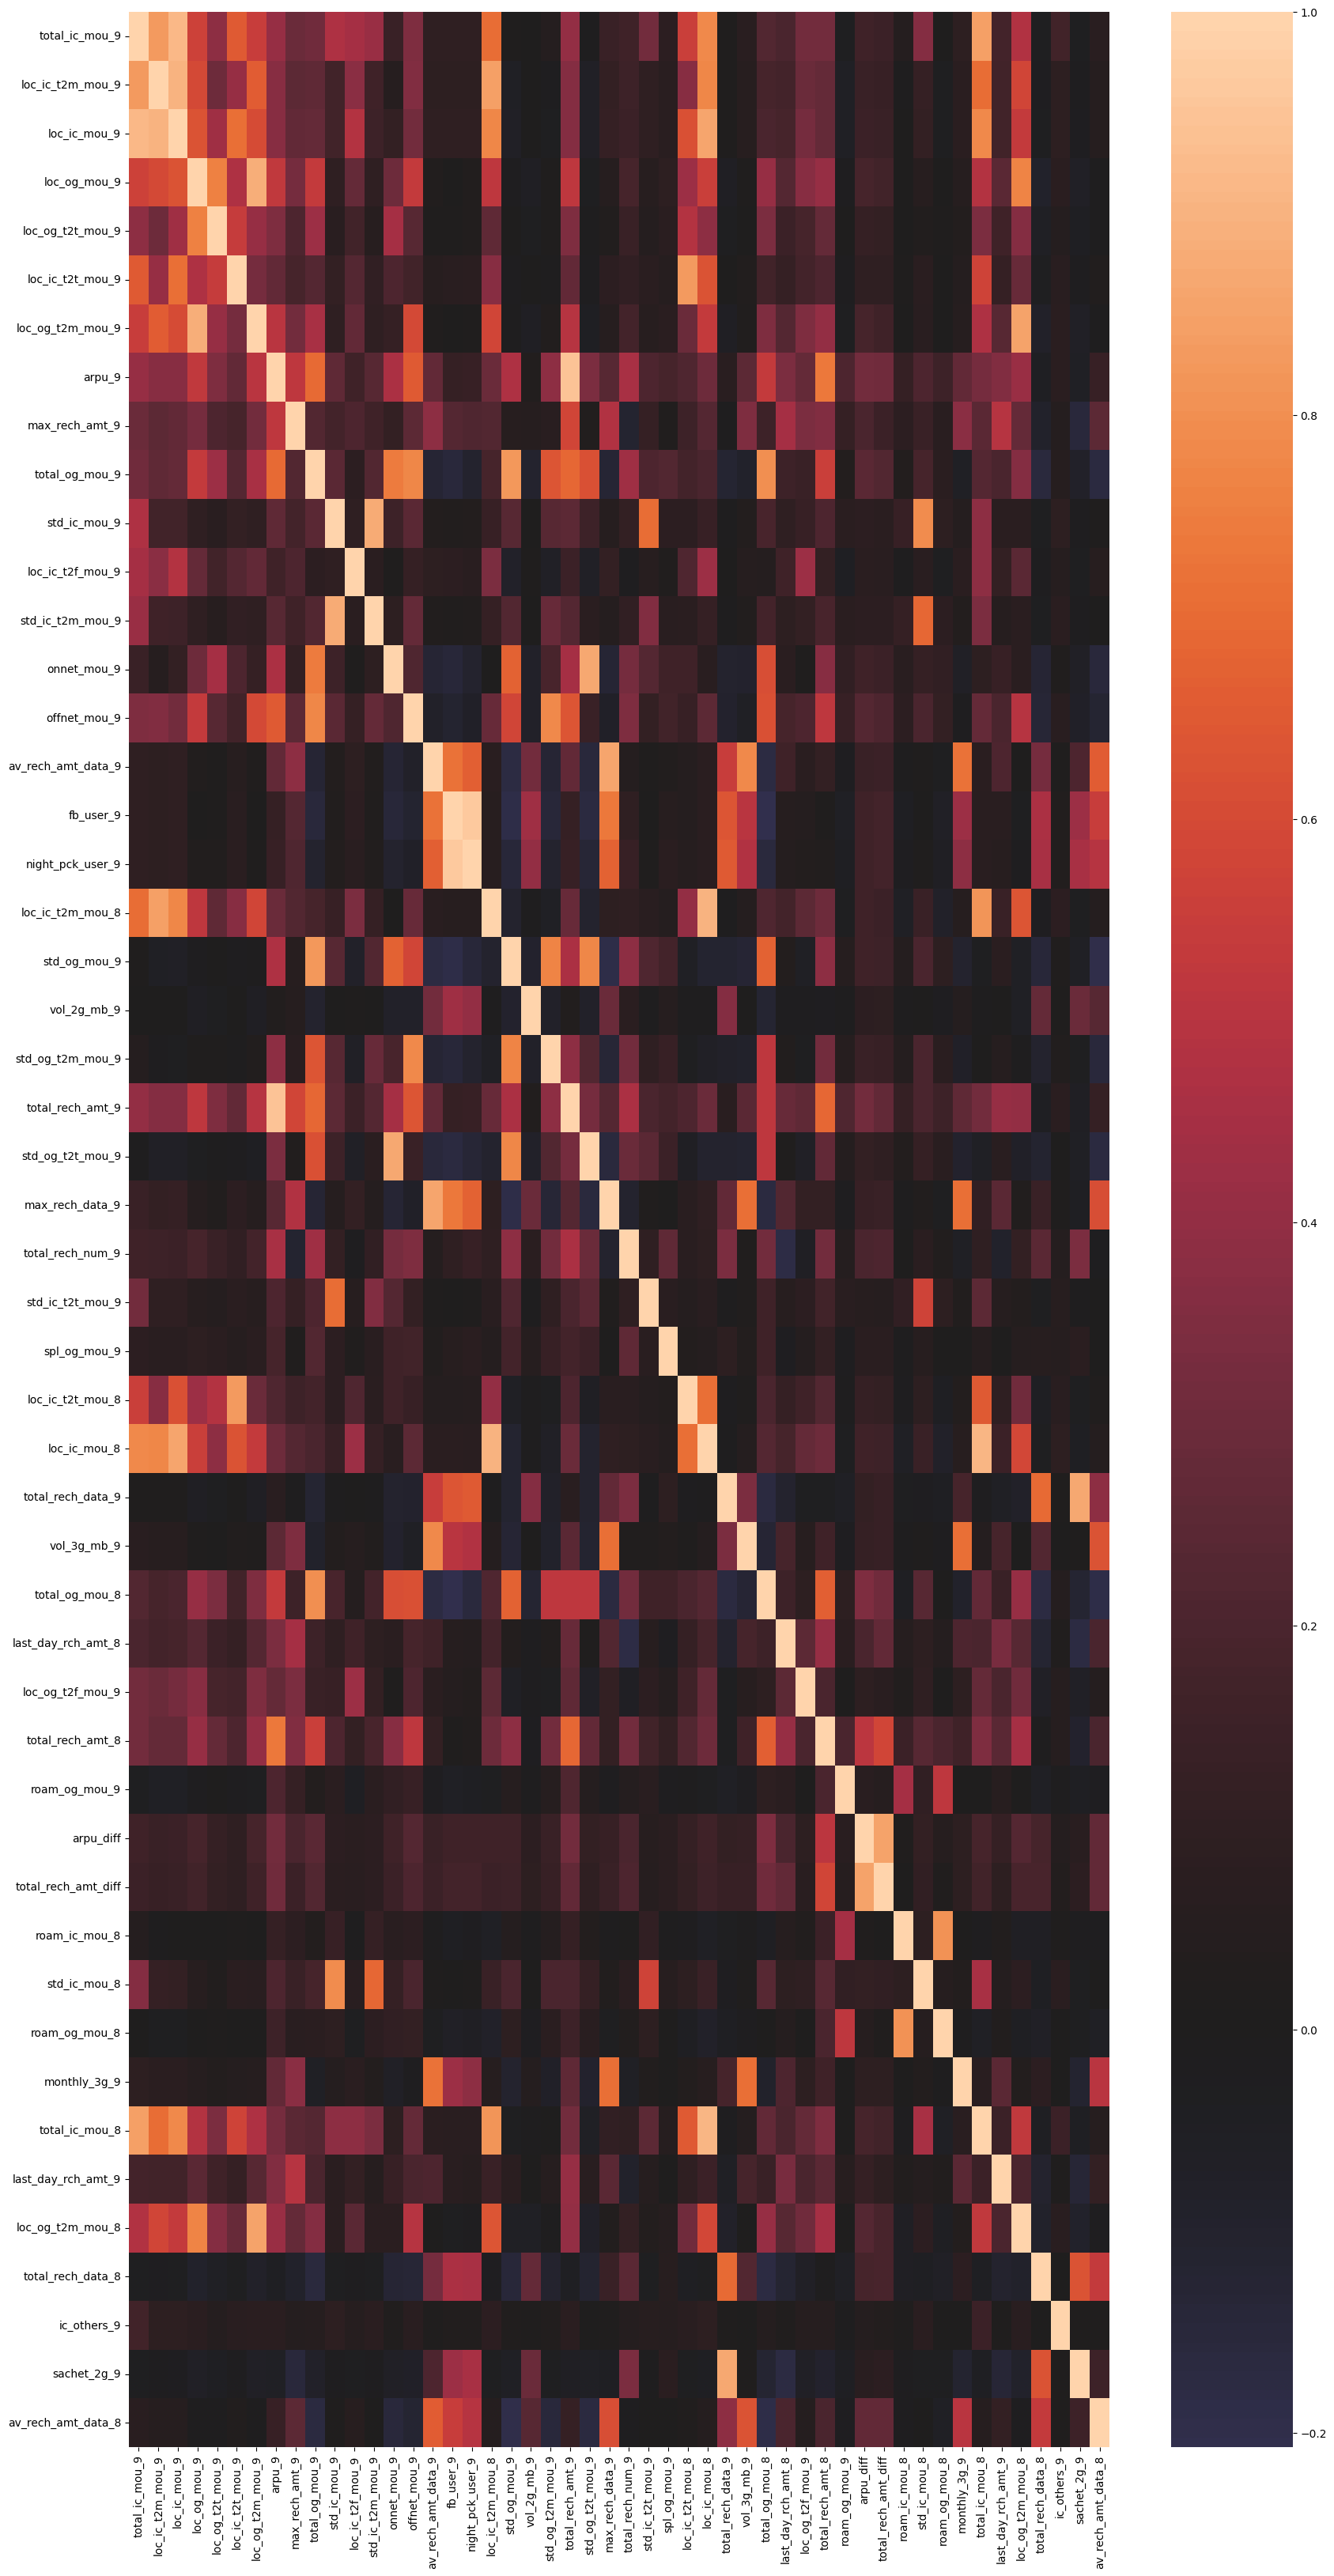

In [ ]:
# plot feature correlation
plt.figure(figsize = (20,40))
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_fea].corr(), center=0.0)
plt.show()

In [ ]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [ ]:
# logistic regression
step = [('scaler', StandardScaler()),("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]
logistic = Pipeline(step)
param = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model = GridSearchCV(estimator = logistic, cv = fold, param_grid = param, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [ ]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [ ]:
# best hyperparameters score
model.best_score_

0.8737220640594027

In [ ]:
# best hyperparameters
model.best_params_

{'logistic__C': 10, 'logistic__penalty': 'l2'}

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5795 1086]
 [ 120  488]]
Sensitivity: 	0.8
Specificity: 	0.84
ROC:    	 0.88


In [ ]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [ ]:
#intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [ ]:
z#coefficients
coefficient = logistic_model.coef_.reshape((9, 1)).tolist()
coefficient = [val for sublist in coefficient for val in sublist]
coefficient = [round(coefficient, 3) for coefficient in coefficient]
logistic_feature = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_feature)

In [ ]:
#concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.519571,-1.150798,-0.702449,-1.527341,0.238178,-0.022103,0.213829,0.064128,-0.793145,0.939986


In [ ]:
Primary Indicators of Churn:
Based on the above data, it is evident that the factors influencing churn include 
total_ic_mou_8 (Total Incoming Calls: Minutes of usage during the action phase), 
total_rech_amt_diff (Total Recharge Amount Difference), 
total_og_mou_8 (Total Outgoing Calls: Minutes of usage during the action phase),
arpu (Average Revenue Per User),
roam_ic_mou_8 (Roaming Incoming Calls: Minutes of usage during the action phase), 
roam_og_mou_8 (Roaming Outgoing Calls: Minutes of usage during the action phase), 
std_ic_mou_8 (STD Incoming Calls: Minutes of usage during the action phase), 
std_og_mou_8 (STD Outgoing Calls: Minutes of usage during the action phase), 
and av_rech_amt_data_8 (Average Recharge Amount during the action phase).

Strategies to Reduce Churn:

Offer special discounts to customers based on their usage.

Provide additional internet services upon recharge.

Engage with customers to understand and meet their needs.

Reduce data tariffs and improve 2G coverage in areas where 3G is unavailable.

Expand the 3G network in regions currently lacking 3G availability.